In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys

sys.path.insert(0,'./src/')

from models import Repressilator

# model spec
- genes $G_1,G_2,G_3$
- mRNA $M_i$
- protein $P_i$

$$
G_i \to \xrightarrow{\alpha_0 + \alpha K^n/(K^n+P_j^n)} M_i, \quad M_i \xrightarrow{\beta} M_i + P_i, \quad P_i \xrightarrow{\beta} \empty, \quad M_i\xrightarrow{\gamma} \empty
$$
where $j = i-1 \mod 3$

## PARAMETERS

In [2]:
alpha0 = 1
alpha = 1000
n = 2
K = 20
beta = 5
gamma = 1

model_parameter = np.array([alpha0,alpha,n,K,beta,gamma])

## Initial Conditions

In [3]:
X_init = np.array([0,0,0,40,20,60])

## Build the model

In [4]:
repre = Repressilator(model_parameter)

In [5]:
x,r,t = repre.gilespie(X_init,10)

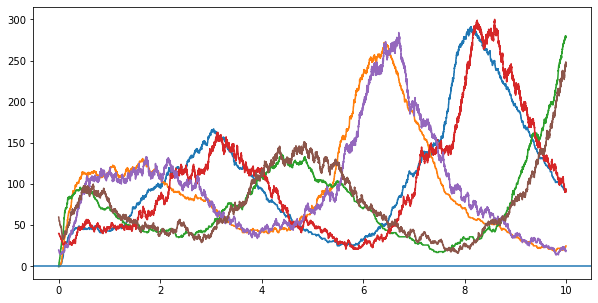

In [6]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.plot(t,x[:,i])

plt.axhline(0)

In [7]:
x,r,t = repre.tau_leaping(X_init,1e-3,10)

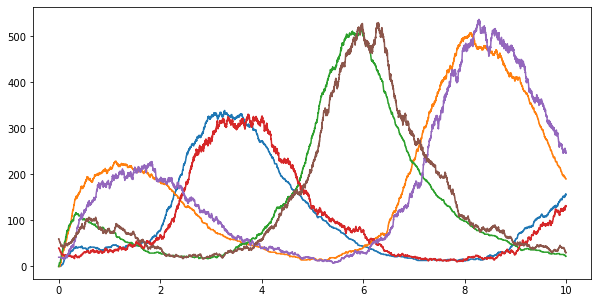

In [9]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.plot(t,x[:,i])